<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/ANN_SDP_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
data =pd.read_csv('Minitab.csv')

In [ ]:
data

,StdOrder,RunOrder,PtType,Blocks,DOC (mm),Displacement (mm),Rev (rad/s),Stress,Defomation
0,22,1,1,1,6,40,1,6174.00,237.980
1,7,2,1,1,2,60,1,3384.00,211.380
2,20,3,1,1,6,20,2,1740.00,192.560
3,2,4,1,1,2,20,2,1623.80,180.900
4,16,5,1,1,4,60,1,261.20,72.200
5,15,6,1,1,4,40,3,1490.00,142.400
6,6,7,1,1,2,40,3,1288.39,136.181
7,1,8,1,1,2,20,1,1540.00,55.900
8,24,9,1,1,6,40,3,4149.00,227.090
9,3,10,1,1,2,20,3,1522.50,174.810


In [ ]:
data=data.iloc[:,4:]

In [ ]:
data

,DOC (mm),Displacement (mm),Rev (rad/s),Stress,Defomation
0,6,40,1,6174.00,237.980
1,2,60,1,3384.00,211.380
2,6,20,2,1740.00,192.560
3,2,20,2,1623.80,180.900
4,4,60,1,261.20,72.200
5,4,40,3,1490.00,142.400
6,2,40,3,1288.39,136.181
7,2,20,1,1540.00,55.900
8,6,40,3,4149.00,227.090
9,2,20,3,1522.50,174.810


(array([[27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  2.,  8.,  4.,  3.,  4.,  1.,  1.,  0.,  1.],
        [27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([1.0000e+00, 6.1830e+02, 1.2356e+03, 1.8529e+03, 2.4702e+03,
        3.0875e+03, 3.7048e+03, 4.3221e+03, 4.9394e+03, 5.5567e+03,
        6.1740e+03]),
 <a list of 5 BarContainer objects>)

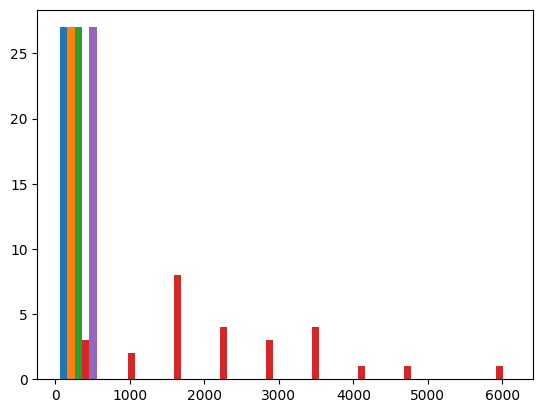

In [ ]:
plt.hist(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOC (mm)           27 non-null     int64  
 1   Displacement (mm)  27 non-null     int64  
 2   Rev (rad/s)        27 non-null     int64  
 3   Stress             27 non-null     float64
 4   Defomation         27 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.2 KB


In [ ]:
def augment_data(original_data, num_duplicates=10000, noise_factor=0.01):
    augmented_data = original_data.copy()
    for _ in range(num_duplicates):
        new_data_point = original_data.sample().values.flatten()
        noise = np.random.normal(0, noise_factor, size=new_data_point.shape)
        new_data_point += noise
        augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
    return augmented_data

In [ ]:
augmented_data = augment_data(data, num_duplicates=10000)

Streaming output truncated to the last 5000 lines.
<ipython-input-77-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
<ipython-input-77-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
<ipython-input-77-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(pd.Series(new_data_point, index=augmented_data.columns), ignore_index=True)
<ipython-input-77-8495338ceb66>:7: FutureWarning: The frame.append method is deprecated and wi

In [ ]:
augmented_data = pd.concat([data, augmented_data], ignore_index=True)

In [ ]:
augmented_data

,DOC (mm),Displacement (mm),Rev (rad/s),Stress,Defomation
0,6.000000,40.000000,1.000000,6174.000000,237.980000
1,2.000000,60.000000,1.000000,3384.000000,211.380000
2,6.000000,20.000000,2.000000,1740.000000,192.560000
3,2.000000,20.000000,2.000000,1623.800000,180.900000
4,4.000000,60.000000,1.000000,261.200000,72.200000
...,...,...,...,...,...
10049,1.995742,40.000666,0.972639,2192.199993,362.807866
10050,2.009817,60.004347,3.012032,2364.291191,175.363833
10051,4.012417,60.000853,3.005033,1573.808685,235.179995
10052,2.010493,20.003278,1.010835,1539.987743,55.894533


In [ ]:
augmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DOC (mm)           10054 non-null  float64
 1   Displacement (mm)  10054 non-null  float64
 2   Rev (rad/s)        10054 non-null  float64
 3   Stress             10054 non-null  float64
 4   Defomation         10054 non-null  float64
dtypes: float64(5)
memory usage: 392.9 KB


(array([[10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [ 1136.,   741.,  2933.,  1496.,  1117.,  1479.,   386.,   375.,
             0.,   391.],
        [10054.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]]),
 array([9.63009996e-01, 6.18269370e+02, 1.23557573e+03, 1.85288209e+03,
        2.47018845e+03, 3.08749481e+03, 3.70480117e+03, 4.32210753e+03,
        4.93941389e+03, 5.55672025e+03, 6.17402661e+03]),
 <a list of 5 BarContainer objects>)

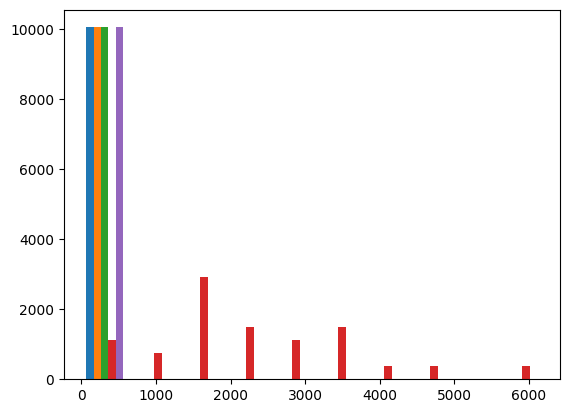

In [ ]:
plt.hist(augmented_data)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
augmented_data

,DOC (mm),Displacement (mm),Rev (rad/s),Stress,Defomation
0,6.000000,40.000000,1.000000,6174.000000,237.980000
1,2.000000,60.000000,1.000000,3384.000000,211.380000
2,6.000000,20.000000,2.000000,1740.000000,192.560000
3,2.000000,20.000000,2.000000,1623.800000,180.900000
4,4.000000,60.000000,1.000000,261.200000,72.200000
...,...,...,...,...,...
10049,1.995742,40.000666,0.972639,2192.199993,362.807866
10050,2.009817,60.004347,3.012032,2364.291191,175.363833
10051,4.012417,60.000853,3.005033,1573.808685,235.179995
10052,2.010493,20.003278,1.010835,1539.987743,55.894533


In [ ]:
X_ann = augmented_data[['DOC (mm)', 'Displacement (mm)', 'Rev (rad/s)']]
y_ann_stress = augmented_data['Stress']
y_ann_deformation=augmented_data['Defomation']

In [ ]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann_stress, test_size=0.2, random_state=42)

In [ ]:
scaler_ann = StandardScaler()
X_train_scaled_ann = scaler_ann.fit_transform(X_train_ann)
X_test_scaled_ann = scaler_ann.transform(X_test_ann)


In [ ]:
model_ann_stress = Sequential()
model_ann_stress.add(Dense(64, activation='relu', input_dim=X_train_scaled_ann.shape[1]))
model_ann_stress.add(Dense(32, activation='relu'))
model_ann_stress.add(Dense(1, activation='linear'))  # Linear activation for regression
model_ann_stress.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model_ann_stress.fit(X_train_scaled_ann, y_train_ann, epochs=50, batch_size=32, validation_data=(X_test_scaled_ann, y_test_ann))


Epoch 1/50
252/252 [==============================] - 2s 4ms/step - loss: 6838917.0000 - val_loss: 6510285.0000
Epoch 2/50
252/252 [==============================] - 1s 3ms/step - loss: 4794494.5000 - val_loss: 3179472.5000
Epoch 3/50
252/252 [==============================] - 1s 3ms/step - loss: 2081371.3750 - val_loss: 1653322.5000
Epoch 4/50
252/252 [==============================] - 1s 3ms/step - loss: 1557338.6250 - val_loss: 1527995.5000
Epoch 5/50
252/252 [==============================] - 1s 3ms/step - loss: 1480962.3750 - val_loss: 1461176.8750
Epoch 6/50
252/252 [==============================] - 1s 3ms/step - loss: 1421598.8750 - val_loss: 1401877.2500
Epoch 7/50
252/252 [==============================] - 1s 3ms/step - loss: 1374762.7500 - val_loss: 1356529.0000
Epoch 8/50
252/252 [==============================] - 1s 3ms/step - loss: 1332769.5000 - val_loss: 1314291.0000
Epoch 9/50
252/252 [==============================] - 1s 3ms/step - loss: 1294475.3750 - val_loss: 12771

In [ ]:
mse_ann_stress = model_ann_stress.evaluate(X_test_scaled_ann, y_test_ann)
print(f'ANN for Stress - Mean Squared Error: {mse_ann_stress}')

63/63 [==============================] - 0s 2ms/step - loss: 89290.2422
ANN for Stress - Mean Squared Error: 89290.2421875


In [ ]:
y_pred_ann_stress = model_ann_stress.predict(X_test_scaled_ann)

63/63 [==============================] - 0s 2ms/step


In [ ]:
r2_ann_stress = r2_score(y_test_ann, y_pred_ann_stress)
print(f'ANN for Stress - R2 Score: {r2_ann_stress}')

ANN for Stress - R2 Score: 0.9520826738065783
